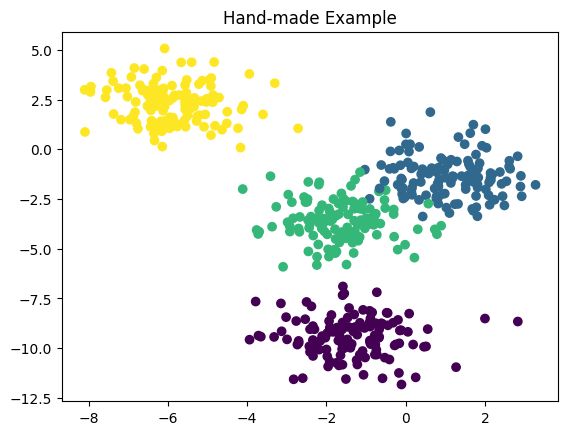

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
X, y = datasets.make_blobs(centers=4, random_state=2, n_samples=500)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Hand-made Example")
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

w = 28
h = 28
num_classes = 10

# PyTorch models inherit from torch.nn.Module
class GarmentClassifier(nn.Module):
    def __init__(self):
        super(GarmentClassifier, self).__init__()
        self.input = nn.Flatten()
        self.fc1 = nn.Linear(w*h, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, num_classes)

    def forward(self, x):
        x = self.input(x)
        x = F.tanh(self.fc1(x))
        x = F.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

model = GarmentClassifier()

In [ ]:
# This criterion computes the cross entropy loss between input logits and target.
loss_fn = torch.nn.CrossEntropyLoss()

# We will use Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)